# Kmeans

## Objetivo

La misma empresaquiere encontrar una manera optima de ordenar las cervezas para que los clientes puedan hacer unas búsquedasmás eficientesen la tienda online. Para ello dispone de un set de datos de cervezas. Aplica un algoritmo de manera que se obtengan dichos grupos.

## Cuestiones

1)Realiza todo  el  preprocesamiento  que seanecesariopara adaptar  las  variables  que  no  sean unívocasdel datasety poder usarel algoritmo adecuado.(1 punto)

2)Utiliza varias configuraciones teniendo en cuenta el número de grupos que se creará y cambiando cómo se mide la distancia entre individuos. Crea una tabla donde se incluya toda la información y el número necesario de iteraciones para llegar a dicha solución.Se considera la mejor solución aquella que necesite menos iteraciones.(1 punto)

3)Con la mejor configuración del punto anterior. Utiliza dos criterios para elegir el lugar inicial del punto central de los grupos.Dibuja cómo se van modificando los grupos y cómo van cambiando sus centroidesen  cada iteración. Obténuna  conclusión acerca de donde deberían situarse los centroides.(1 punto)

4)Estudia que técnicas de postprocesamientose podrían aplicaren base al error cometido en cada clúster. (1 punto)

### Librerias

In [85]:
import pandas as pd
import matplotlib.pyplot as plt  
import numpy as np  
from pylab import *
from sklearn.cluster import KMeans  
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
warnings.filterwarnings('ignore')

### Carga de datos

In [86]:
Datos = pd.read_csv("Datos/cervezas.csv", sep = ";")
print("Hay", len(Datos), "registros.")
Datos.head(10)

Hay 37500 registros.


index  beer/ABV  beer/beerId  beer/brewerId  \
0  40163       5.0        46634          14338   
1   8135      11.0         3003            395   
2  10529       4.7          961            365   
3  44610       4.4          429              1   
4  37062       4.4         4904           1417   
5  14095      10.0        21436             14   
6  13759      12.6        10001             14   
7   3914       8.4        52211          14879   
8  47953       9.0        34361            394   
9   7047       6.2        32676           1386   

                             beer/name               beer/style  \
0                             Chiostro     Herbed / Spiced Beer   
1             Bearded Pat's Barleywine      American Barleywine   
2                 Naughty Nellie's Ale  American Pale Ale (APA)   
3                      Pilsner Urquell           Czech Pilsener   
4            Black Sheep Ale (Special)         English Pale Ale   
5                      YouEnjoyMyStout   Russian Imperial Stout   
6                          Benevolence        American Wild Ale   
7     Frog's Hollow Double Pumpkin Ale              Pumpkin Ale   
8  Stoudt's Barrel Aged Old Abominable       English Barleywine   
9                   One Hop Wonder IPA             American IPA   

   review/appearance  review/aroma  review/overall  review/palate  \
0                4.0           4.0             4.0            4.0   
1                4.0           3.5             3.5            3.5   
2                3.5           4.0             3.5            3.5   
3                3.0           3.0             2.5            3.0   
4                4.0           3.0             3.0            3.5   
5                4.0           4.0             4.0            4.0   
6                4.0           4.5             4.0            4.0   
7                4.0           4.0             4.0            4.0   
8                4.5           4.0             4.5            4.5   
9                2.0           2.0             2.0            2.5   

   review/taste  
0           4.0  
1           3.0  
2           3.5  
3           3.0  
4           2.5  
5           4.5  
6           4.0  
7           4.0  
8           4.5  
9           2.0

### 1) Preprocesamiento

Comprobamos si hay datos nulos en el dataset

In [87]:
nulos = pd.DataFrame(Datos.isnull().sum(), columns=["Número de nulos"])
nulos

Número de nulos
index                            0
beer/ABV                         0
beer/beerId                      0
beer/brewerId                    0
beer/name                        0
beer/style                       0
review/appearance                0
review/aroma                     0
review/overall                   0
review/palate                    0
review/taste                     0

No hay datos nulos en el dataset

### Tratamiento de datos
Transformamos los datos de tipo string a numerico, guardando en df los nombres sin modificar

In [88]:
df =  pd.DataFrame(Datos, columns = ["beer/name", "beer/style"])
# Transformación a datos numéricos de la columna "beer/name".
encoderD = preprocessing.LabelEncoder()
encoderD.fit(Datos["beer/name"])
Datos["beer/name"] = encoderD.transform(Datos["beer/name"])
# Transformación a datos numéricos de la columna "beer/style".
encoderD = preprocessing.LabelEncoder()
encoderD.fit(Datos["beer/style"])
Datos["beer/style"] = encoderD.transform(Datos["beer/style"])
df.head(10)

beer/name               beer/style
0                             Chiostro     Herbed / Spiced Beer
1             Bearded Pat's Barleywine      American Barleywine
2                 Naughty Nellie's Ale  American Pale Ale (APA)
3                      Pilsner Urquell           Czech Pilsener
4            Black Sheep Ale (Special)         English Pale Ale
5                      YouEnjoyMyStout   Russian Imperial Stout
6                          Benevolence        American Wild Ale
7     Frog's Hollow Double Pumpkin Ale              Pumpkin Ale
8  Stoudt's Barrel Aged Old Abominable       English Barleywine
9                   One Hop Wonder IPA             American IPA

Centramos los datos y reducimos la dimensionalidad del conjunto para poder pintar posteriormente un mapa en 2D

In [89]:
# Centramos los datos, usamos sklearn para proyectar y capturamos las componentes principales
datos_centrados = StandardScaler().fit_transform(Datos.values)

modelo_PCA = PCA(n_components=2)

componentes_principales = modelo_PCA.fit_transform(datos_centrados)

# Realizamos un dataframe con los autovalores, el % de varianza y el % acumulado
AutoValores = pd.DataFrame()
AutoValores["autovalor"] = modelo_PCA.explained_variance_
AutoValores["% varianza"] = modelo_PCA.explained_variance_ratio_ * 100
AutoValores["% acum"] = modelo_PCA.explained_variance_ratio_.cumsum() * 100
AutoValores

autovalor  % varianza     % acum
0   3.766253   34.237751  34.237751
1   1.923542   17.486282  51.724033

Con dos componentes podemos representar el 51% de los datos

In [90]:
#Dataframe con las principales componentes 
Df_Componentes_Principales = pd.DataFrame(data=componentes_principales, columns=["comp_1", "comp_2"])

# Añadimos la columna con el nombre de las cervezas
Df_Componentes_Principales["beer name"] = df["beer/name"]

# Mostramos el dataframe.
Df_Componentes_Principales.head(10)

comp_1    comp_2                            beer name
0 -0.082207  1.294541                             Chiostro
1  0.657640  0.508544             Bearded Pat's Barleywine
2  1.267735 -0.801881                 Naughty Nellie's Ale
3  3.537692 -1.938519                      Pilsner Urquell
4  2.389976 -1.055787            Black Sheep Ale (Special)
5 -0.687145 -0.124157                      YouEnjoyMyStout
6 -1.424249  0.567631                          Benevolence
7 -0.312054  3.033588     Frog's Hollow Double Pumpkin Ale
8 -1.718235 -0.951645  Stoudt's Barrel Aged Old Abominable
9  5.843316  0.902790                   One Hop Wonder IPA

### 2) Creación de modelos y 3) Centroides

Creamos distintos modelos cambiando el valor de K. Utilizaremos solo los 200 primeros datos con solo estos datos podemos hacernos una idea del resultado y un mayor numero de datos supondria que los graficos que muestran como se quedaria el conjunto no se pudieran comprender correctamente ya que mostramos, aunque transparentados, los nombres de las distintas cervezas.

Al mismo tiempo que realizamos los modelos, mostraremos donde se encontrarian los centroides de los distintos grupos que se van creando. Se podran identificar en las graficas como un punto rojo. Utilizaremos como criterio para encontrarlos las 2 componentes obtenidas anteriormente

Probando modelo con K= 1
Se mostraran solo los 200 primeros valores para poder entender las graficas
---------------------------------------------------------------------------


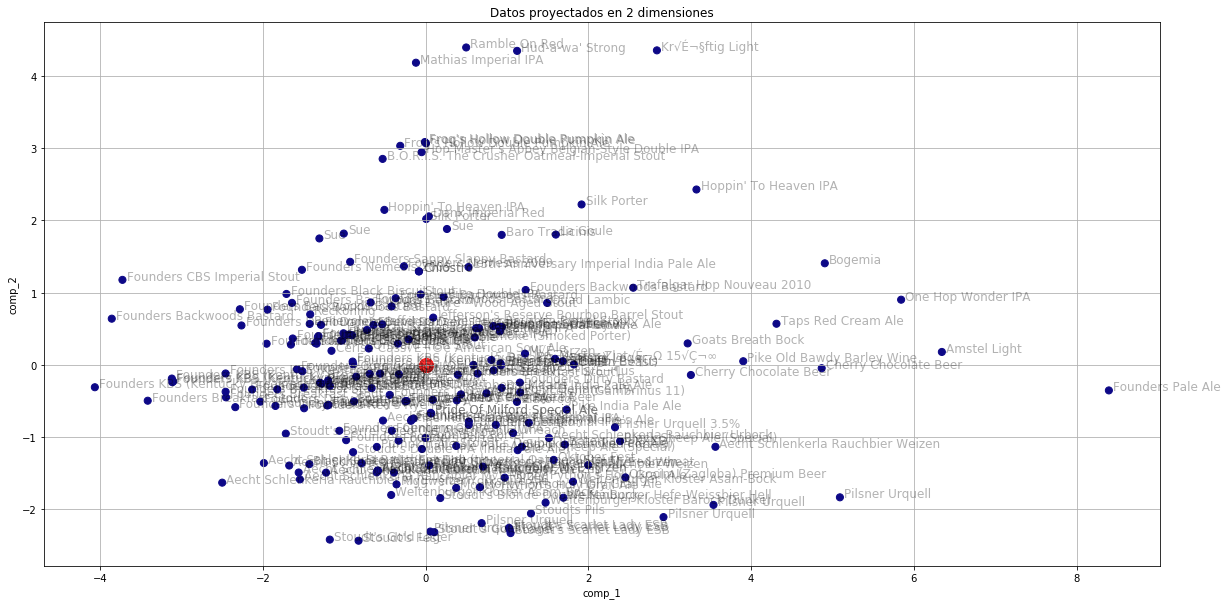

Probando modelo con K= 2
Se mostraran solo los 200 primeros valores para poder entender las graficas
---------------------------------------------------------------------------


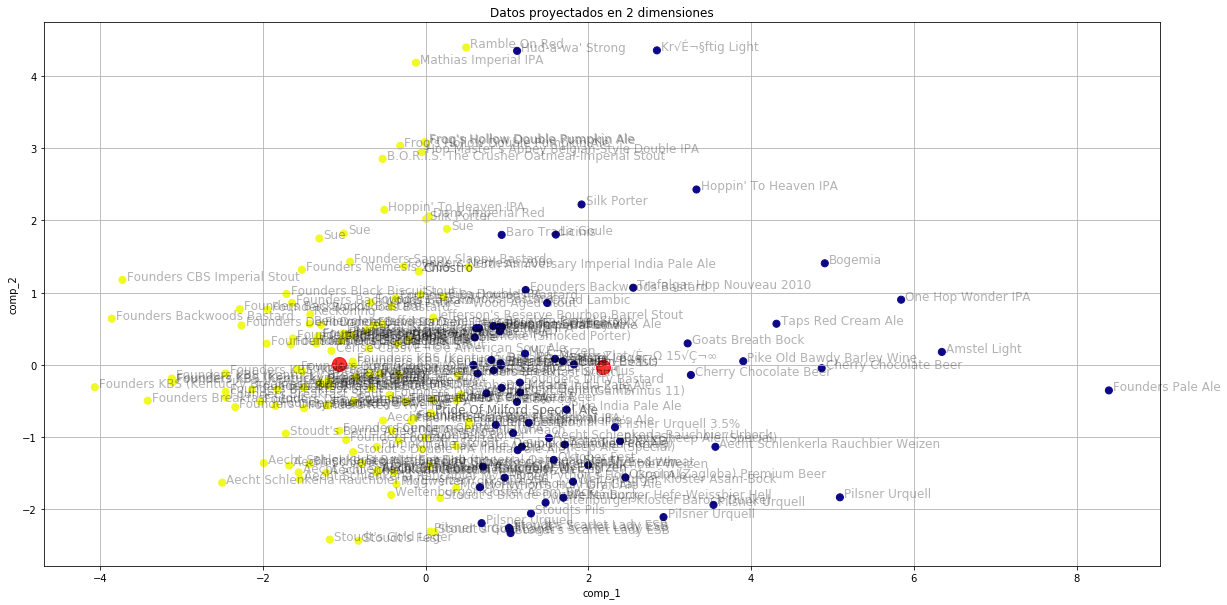

Probando modelo con K= 3
Se mostraran solo los 200 primeros valores para poder entender las graficas
---------------------------------------------------------------------------


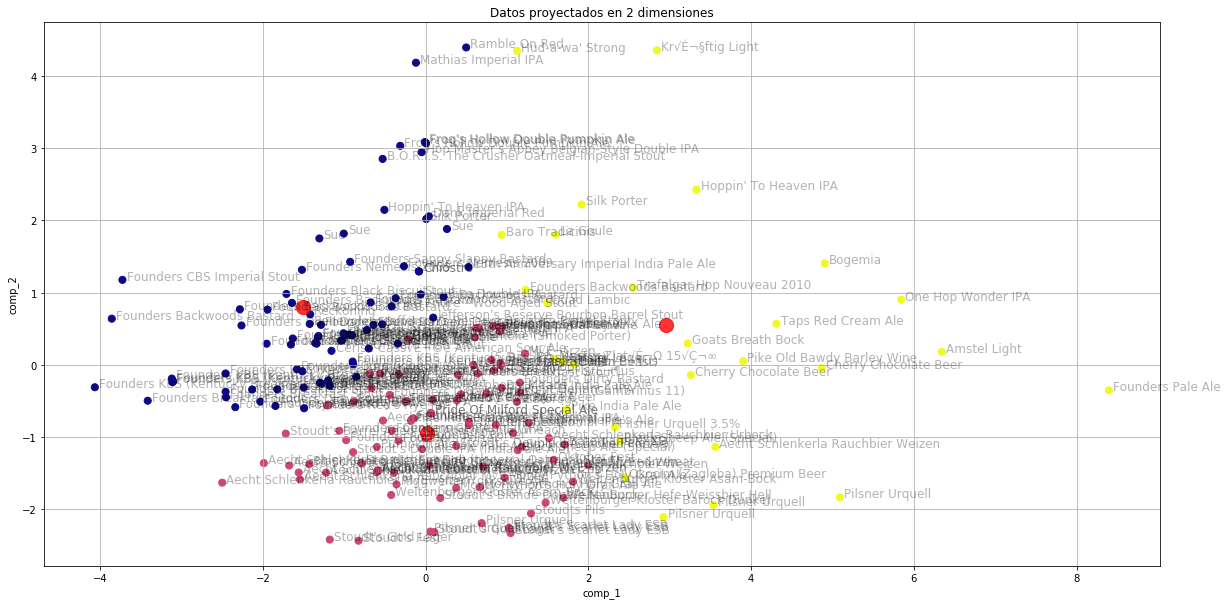

Probando modelo con K= 4
Se mostraran solo los 200 primeros valores para poder entender las graficas
---------------------------------------------------------------------------


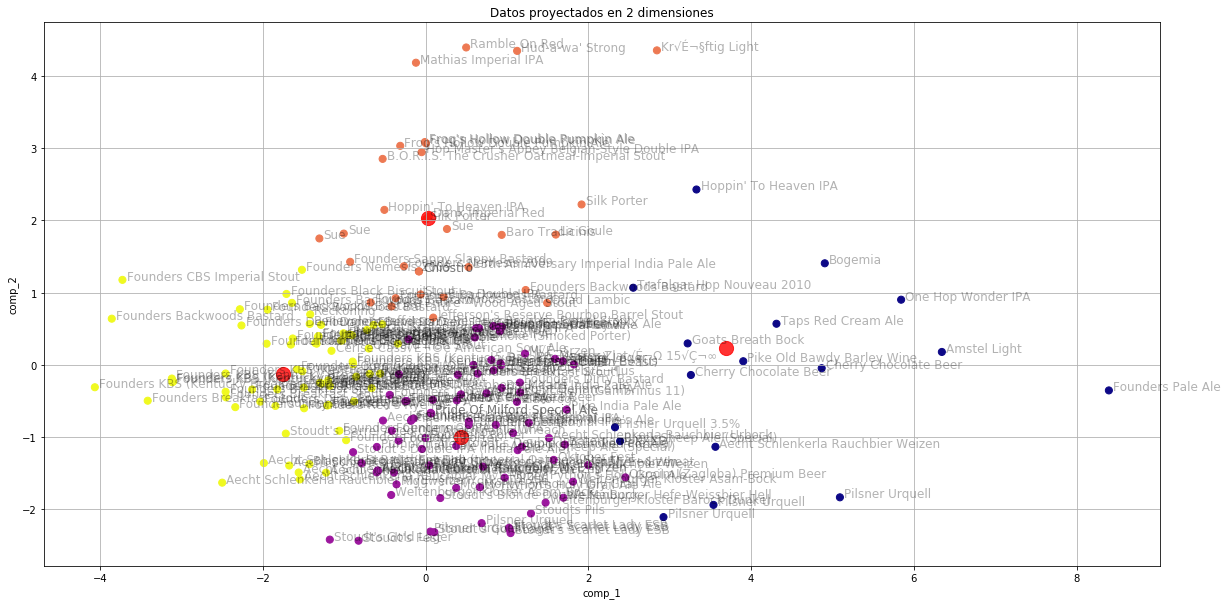

Probando modelo con K= 5
Se mostraran solo los 200 primeros valores para poder entender las graficas
---------------------------------------------------------------------------


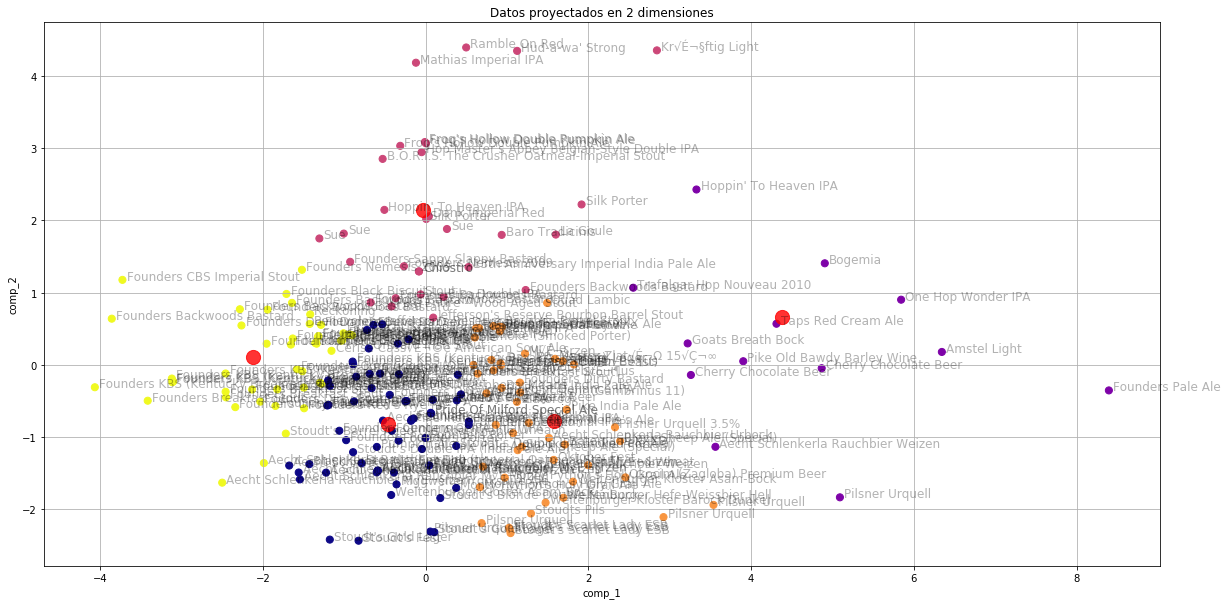

Probando modelo con K= 6
Se mostraran solo los 200 primeros valores para poder entender las graficas
---------------------------------------------------------------------------


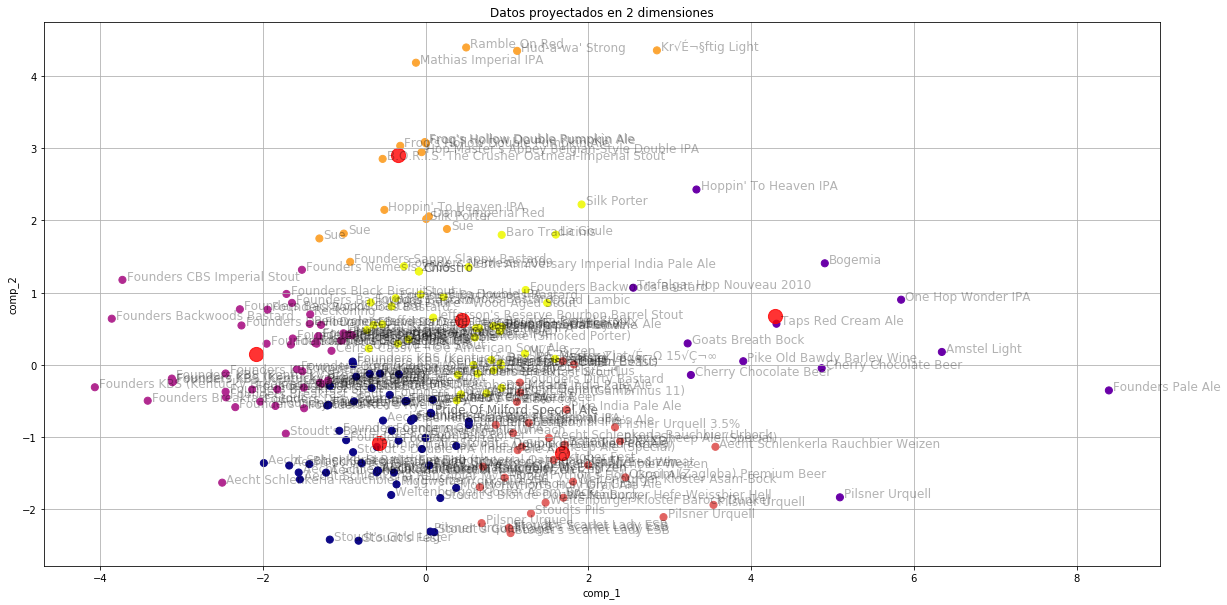

Probando modelo con K= 7
Se mostraran solo los 200 primeros valores para poder entender las graficas
---------------------------------------------------------------------------


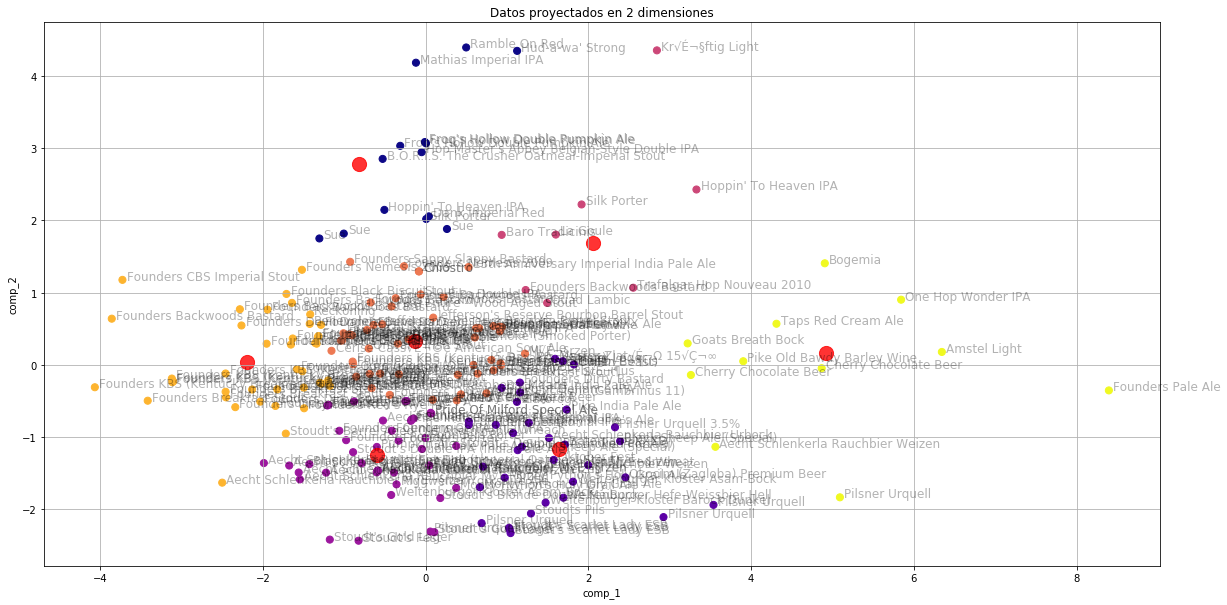

Probando modelo con K= 8
Se mostraran solo los 200 primeros valores para poder entender las graficas
---------------------------------------------------------------------------


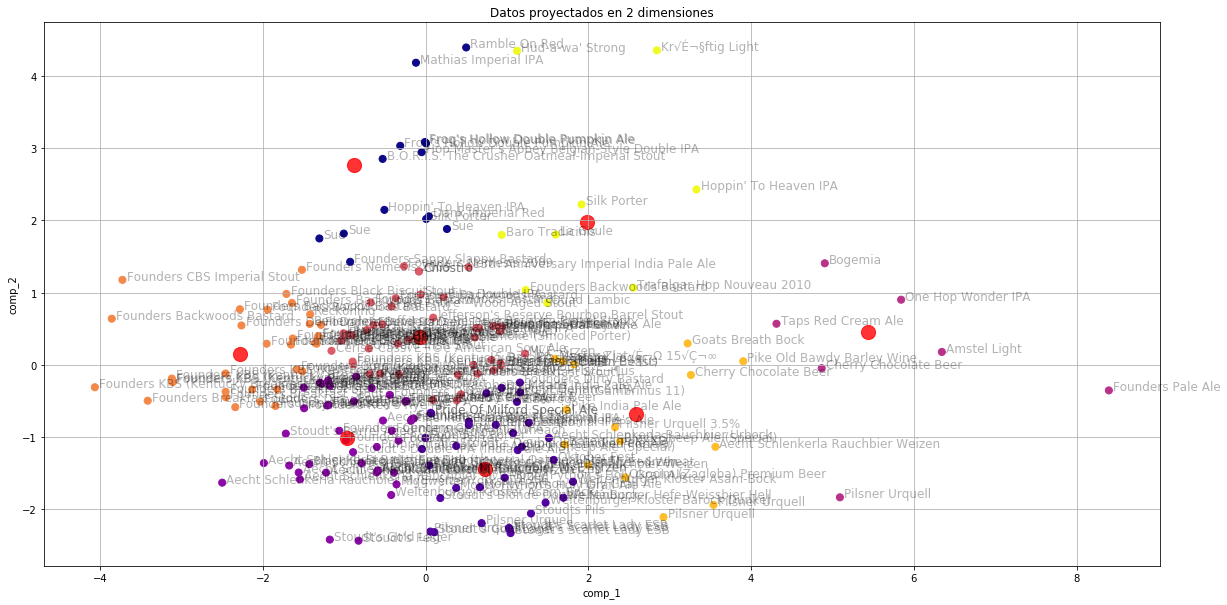

Probando modelo con K= 9
Se mostraran solo los 200 primeros valores para poder entender las graficas
---------------------------------------------------------------------------


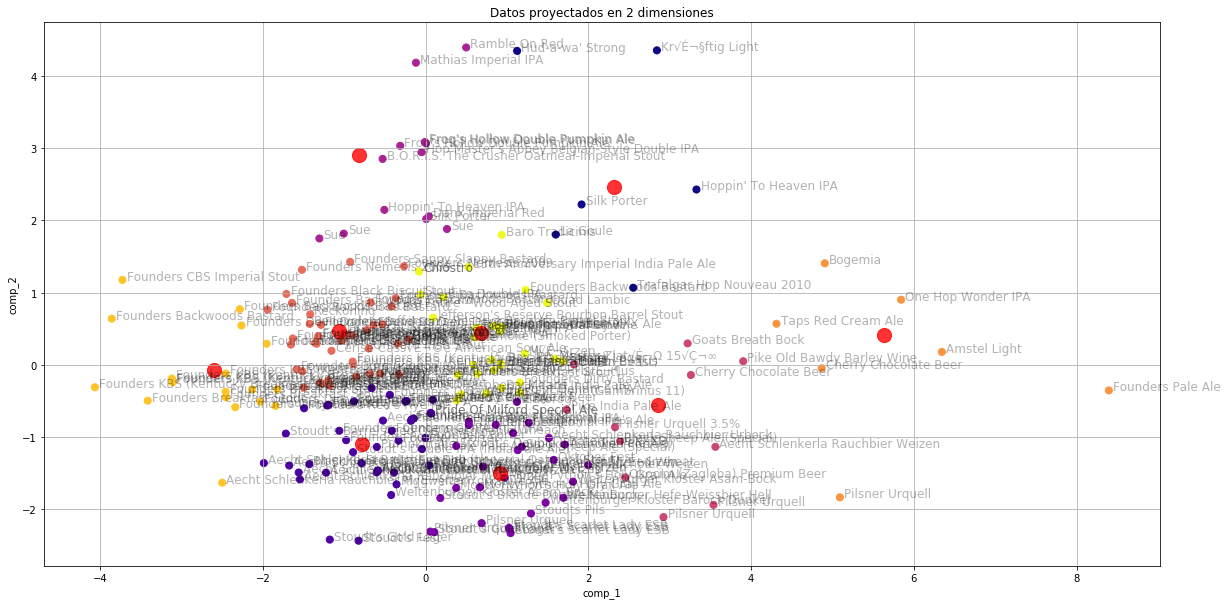

Probando modelo con K= 10
Se mostraran solo los 200 primeros valores para poder entender las graficas
---------------------------------------------------------------------------


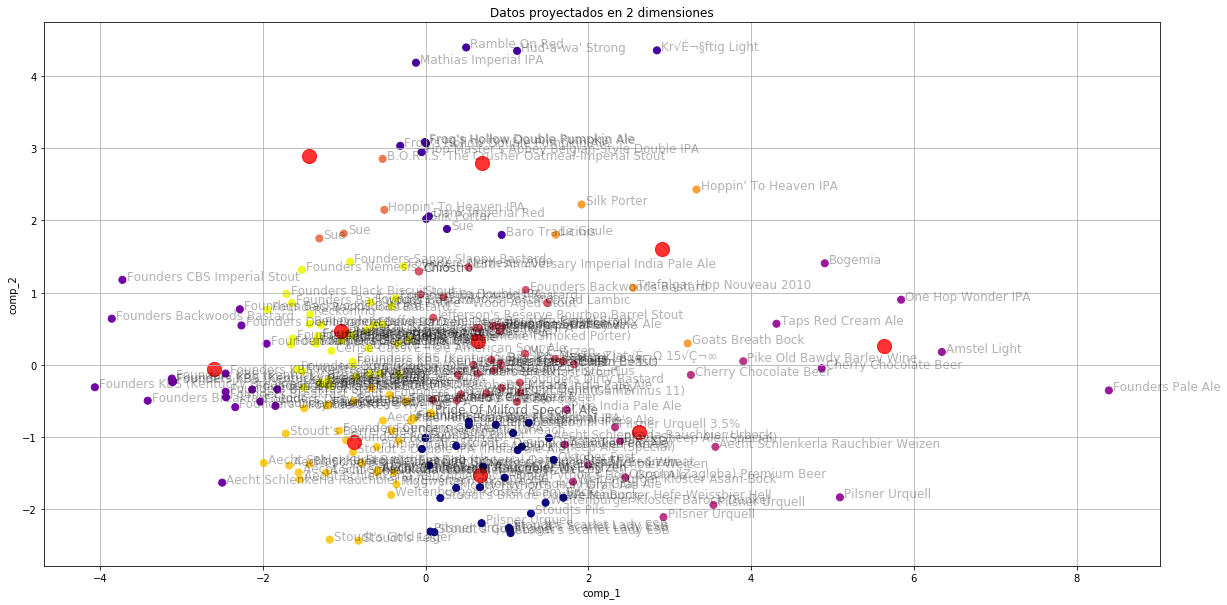

Probando modelo con K= 11
Se mostraran solo los 200 primeros valores para poder entender las graficas
---------------------------------------------------------------------------


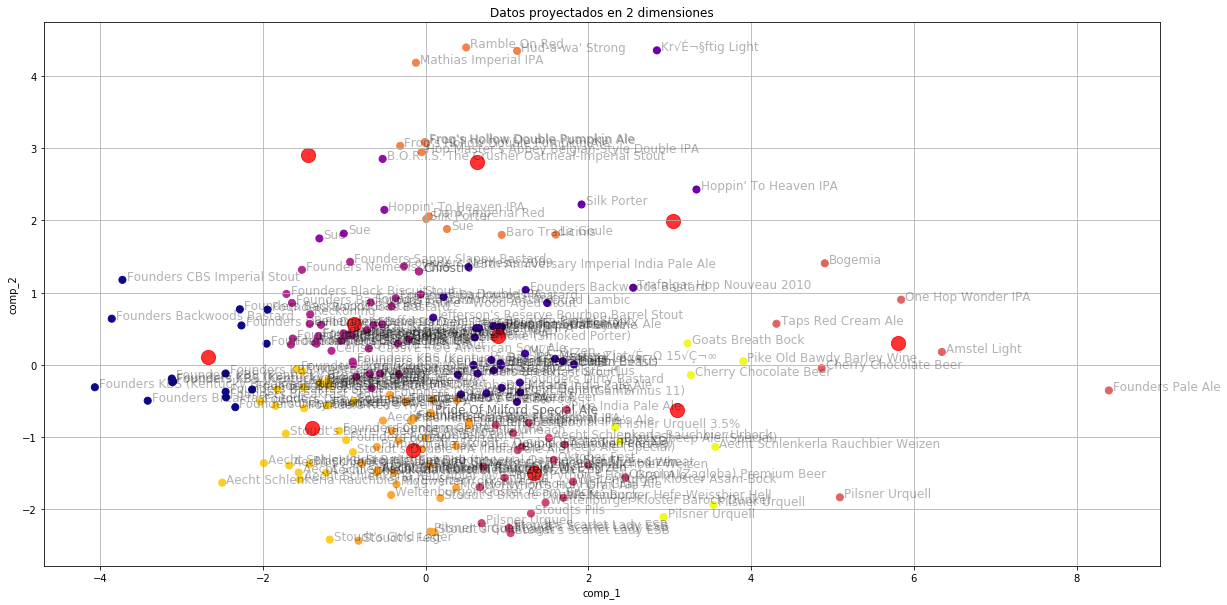

Probando modelo con K= 12
Se mostraran solo los 200 primeros valores para poder entender las graficas
---------------------------------------------------------------------------


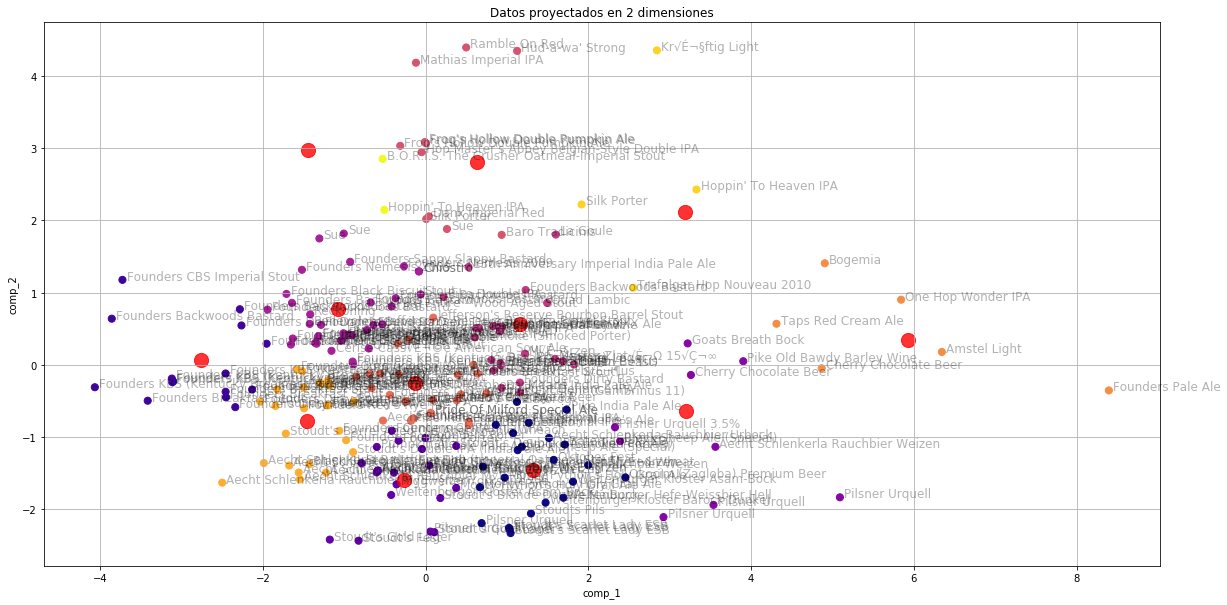

Probando modelo con K= 13
Se mostraran solo los 200 primeros valores para poder entender las graficas
---------------------------------------------------------------------------


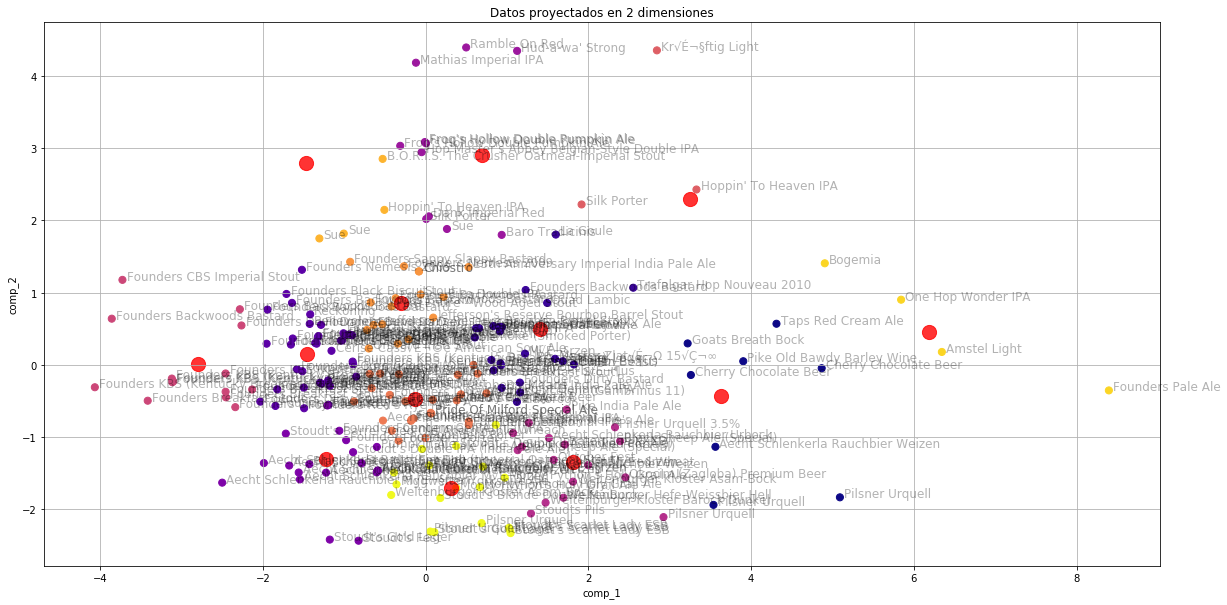

Probando modelo con K= 14
Se mostraran solo los 200 primeros valores para poder entender las graficas
---------------------------------------------------------------------------


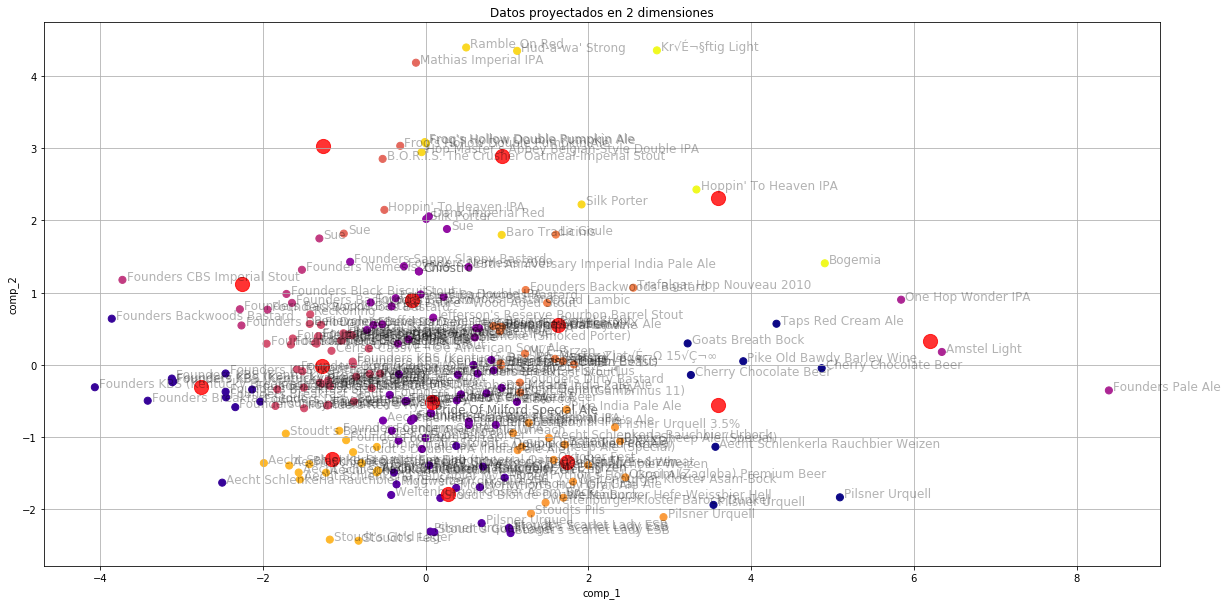

Probando modelo con K= 15
Se mostraran solo los 200 primeros valores para poder entender las graficas
---------------------------------------------------------------------------


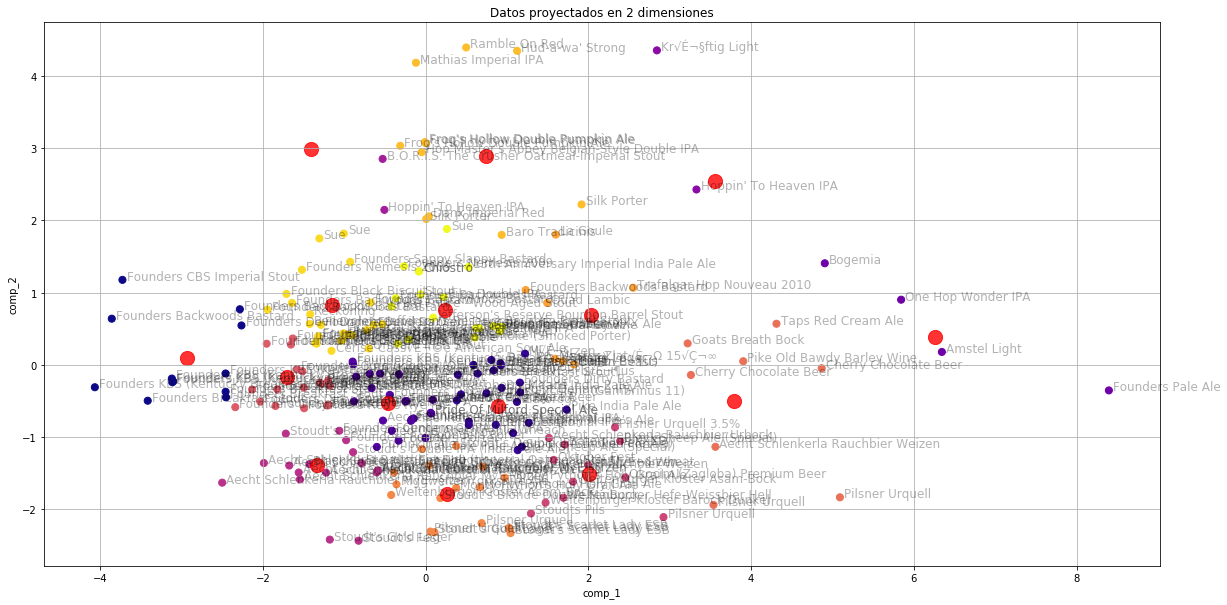

Probando modelo con K= 16
Se mostraran solo los 200 primeros valores para poder entender las graficas
---------------------------------------------------------------------------


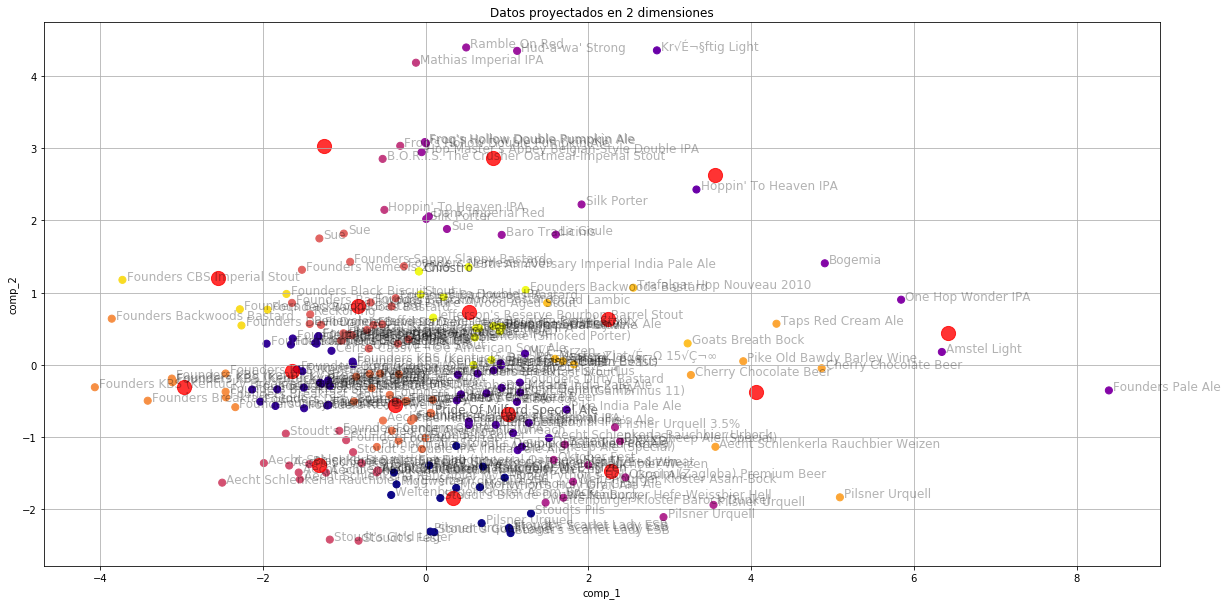

Probando modelo con K= 17
Se mostraran solo los 200 primeros valores para poder entender las graficas
---------------------------------------------------------------------------


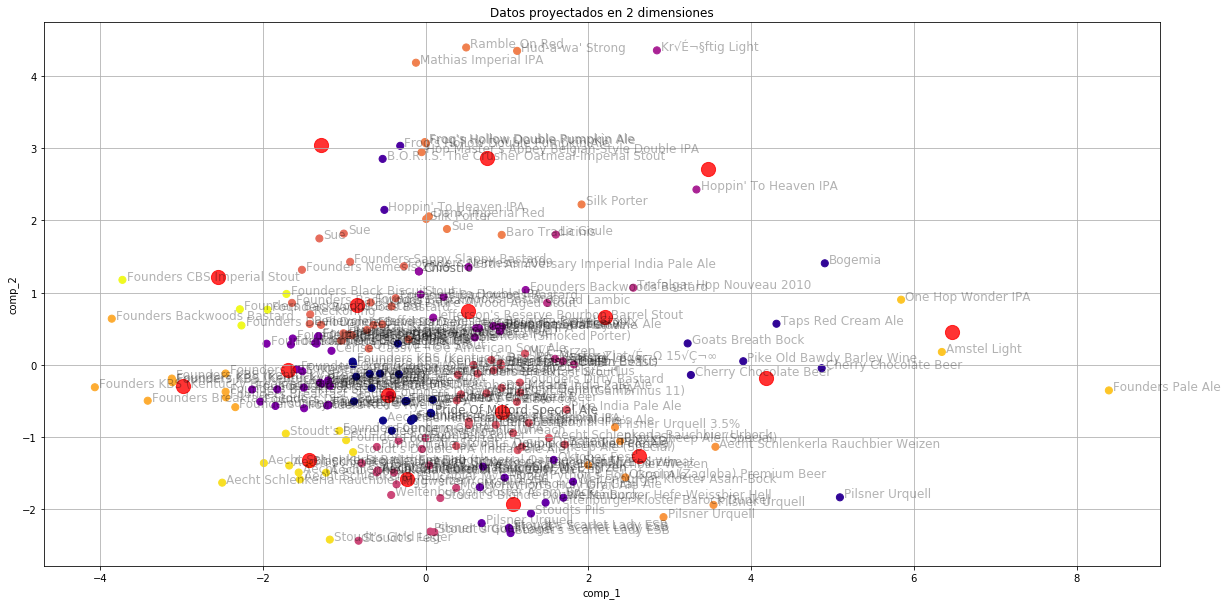

Probando modelo con K= 18
Se mostraran solo los 200 primeros valores para poder entender las graficas
---------------------------------------------------------------------------


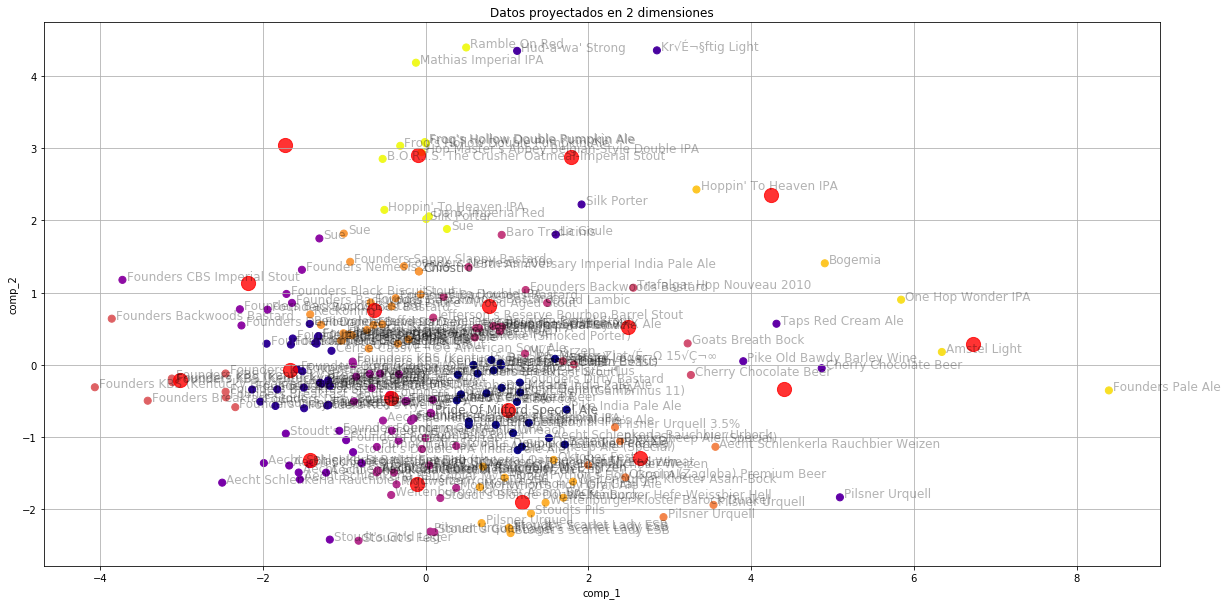

Probando modelo con K= 19
Se mostraran solo los 200 primeros valores para poder entender las graficas
---------------------------------------------------------------------------


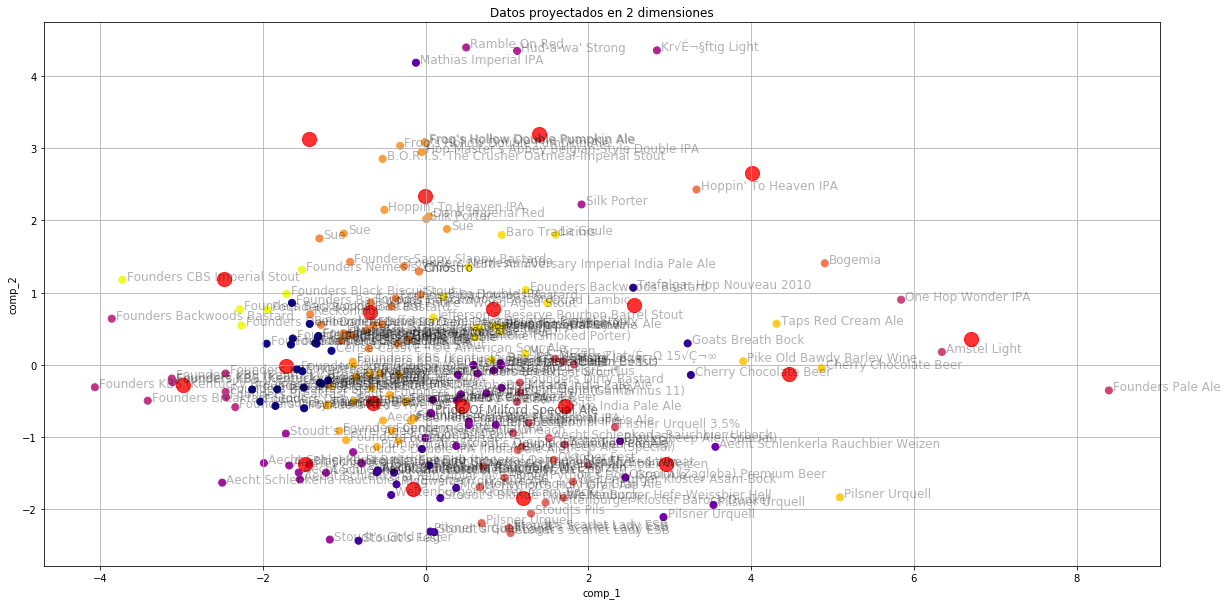

In [91]:
# Distancias de cada modelo.
distancias = {}

# Bucle de modelos con K distintos.
for K in range(1, 20):
    
    print("Probando modelo con K=", K)
    print("Se mostraran solo los 200 primeros valores para poder entender las graficas")
    print("---------------------------------------------------------------------------")

    modelo = KMeans(n_clusters=K, max_iter=50)

    modelo.fit(componentes_principales)
    
    prediccion = modelo.predict(componentes_principales)

    fig, ax = plt.subplots(figsize=(20, 10))
    plt.scatter(Df_Componentes_Principales["comp_1"][:200], Df_Componentes_Principales["comp_2"][:200], 
                c=prediccion[:200], s=50, cmap='plasma')
    
    for i, txt in enumerate(Df_Componentes_Principales["beer name"][:200]):
        pos = (Df_Componentes_Principales["comp_1"][i] + 0.05, Df_Componentes_Principales["comp_2"][i])
        ax.annotate(txt, (Df_Componentes_Principales["comp_1"][i],Df_Componentes_Principales["comp_2"][i]),pos,'data',
                    size=12, alpha=0.3)

    #Mostramos donde estarian localizados los centroides de los distintos grupos
    centroides = modelo.cluster_centers_
    plt.scatter(centroides[:, 0], centroides[:, 1], c='red', s=200, alpha=0.8)
    plt.grid()
    plt.xlabel('comp_1')
    plt.ylabel('comp_2')
    plt.title('Datos proyectados en 2 dimensiones')
    plt.show()
    
    # Guardamos la suma del cuadrado de las distancias de las muestras al centroide más cercano.
    distancias[K] = modelo.inertia_

Se estudia la evolución de la suma de los cuadrados de las distancias entre los centroides. Nos fijaremos en cuanto va decayendo y nos centraremos en ver cuando deja de hacerlo significativamente

In [92]:
dist = []
num = list(distancias.keys())
val = list(distancias.values())
for x in range(0, len(num)):
    dist.append([num[x],val[x]])
dist = pd.DataFrame(dist, columns=["num iteraciones","distancia"])
dist

num iteraciones      distancia
0                 1  213361.635773
1                 2  126515.519020
2                 3   92950.607722
3                 4   67153.148848
4                 5   55990.728932
5                 6   46812.768137
6                 7   39688.488088
7                 8   35156.743287
8                 9   31089.152496
9                10   28587.165476
10               11   26389.023968
11               12   24135.045555
12               13   22404.464217
13               14   20791.497526
14               15   19444.765237
15               16   18167.311848
16               17   17158.912289
17               18   16283.224397
18               19   15566.935512

Para verlo más claramente usaremos una grafica

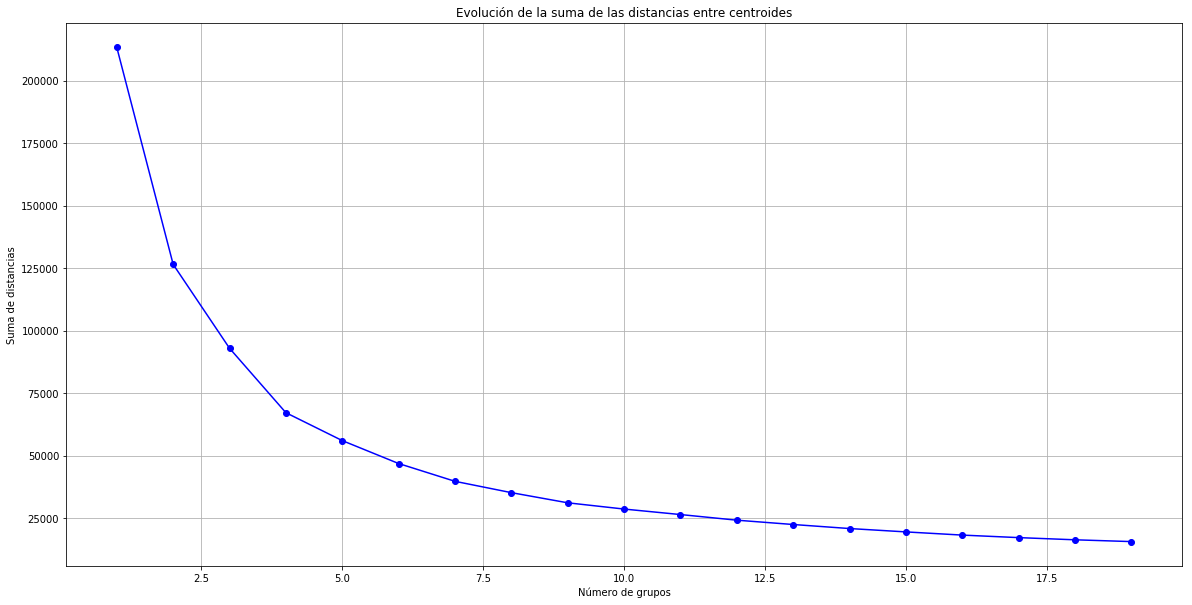

In [95]:
sfig, ax = plt.subplots(figsize=(20, 10))
plt.plot(list(distancias.keys()), list(distancias.values()), 'bo-')
plt.grid()
plt.title("Evolución de la suma de las distancias entre centroides")
plt.xlabel("Número de grupos")
plt.ylabel("Suma de distancias")
plt.show()

Tomaremos el mejor modelo a K=8 ya que es en este momento en el que la caida deja de ser tan significativa y empieza a estabilizarse el ritmo de caida.

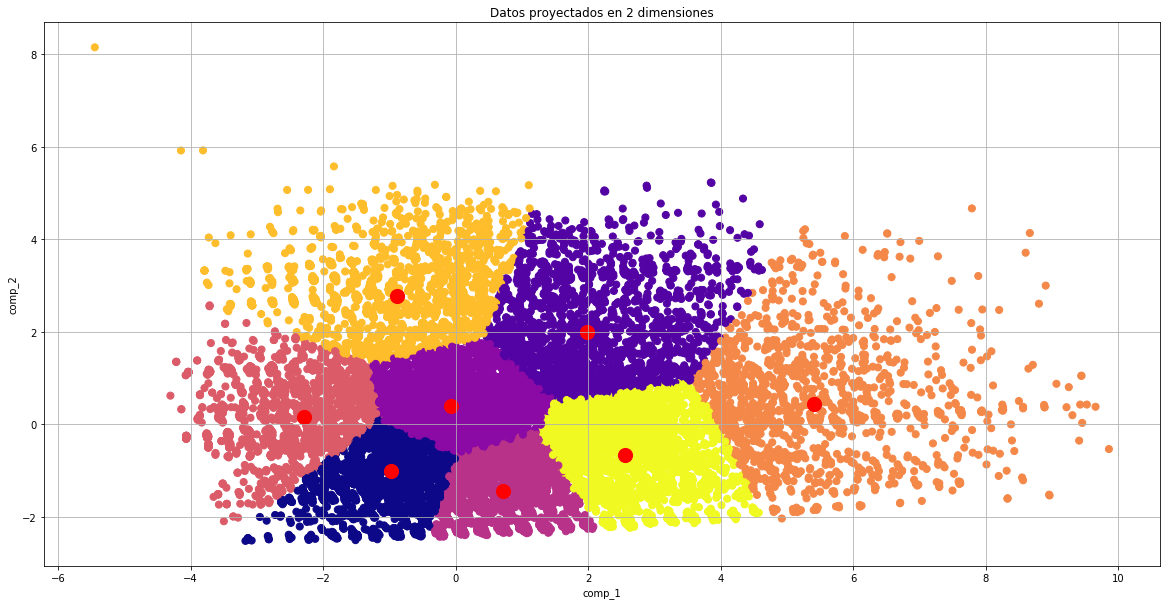

In [96]:
modelo = KMeans(n_clusters=8, max_iter=50)

modelo.fit(componentes_principales)

prediccion = modelo.predict(componentes_principales)

fig, ax = plt.subplots(figsize=(20, 10))
plt.scatter(Df_Componentes_Principales["comp_1"], Df_Componentes_Principales["comp_2"], 
            c=prediccion, s=50, cmap='plasma')

#Mostramos donde estarian localizados los centroides de los distintos grupos
centroides = modelo.cluster_centers_
plt.scatter(centroides[:, 0], centroides[:, 1], c='red', s=200, alpha=1)
plt.grid()
plt.xlabel('comp_1')
plt.ylabel('comp_2')
plt.title('Datos proyectados en 2 dimensiones')
plt.show()

Tras ver el mejor modelo podemos observar, habiendo eliminado los nombres, como los datos se agrupan el 8 distintos grupos, cuyos centroides, en rojo, estan claramente definidos. En esta grafica se encuentran todos los datos del dataset